c:\users\sarth\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


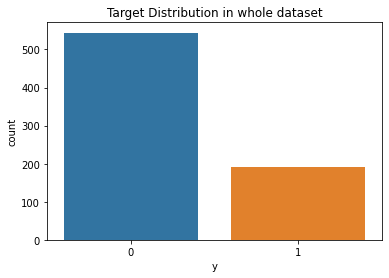

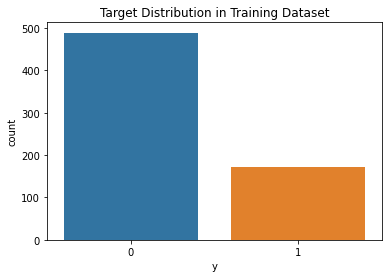

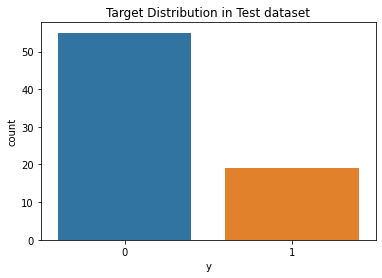

In [34]:
'''
This function generates the training and testing dataset to be used for training and testing purposes with various models respectively. 
'''
from imblearn.over_sampling import SMOTE
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

def generate_train_test_data(split = 0.1, random_state = 42, scaling = 'standard', sampling = False, show_plots = True):

	'''
	This method generates the training and test data. 
	Parameters :- split : Float, (0,1) - fraction of size of testing data to be used to test the model.
				  random_state : Integer - state of the randomization of the sampling data.
				  scaling : String, 'normal_negative', 'normal_positive', 'standard' - Type of scaling to be used, scaling data by 
				  																		[-1,1], [0,1], Standard Normal respectively
				  sampling : Boolean - To generate synthetic data using training data with SMOTE
				  show_plots : Boolean - To show target variable distribution after each sampling method.											
	'''

	data = pd.read_csv('raw.csv', index_col = [0])

	X = data[data.columns[0:100]]

	y = data['y']

	sns.countplot(y).set_title('Target Distribution in whole dataset')
	plt.show()

	X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = random_state, stratify = y, test_size = split)


	if scaling == 'normal_negative':
		scale = MinMaxScaler(feature_range = (-1,1))

	elif scaling == 'normal_positive':
		scale = MinMaxScaler()

	elif scaling == 'standard':
		scale = StandardScaler()

	if sampling == False:

		X_train = scale.fit_transform(X_train)
		X_test = scale.transform(X_test)

		if show_plots == True:
			sns.countplot(x = y_train).set_title('Target Distribution in Training Dataset')
			plt.show()
			sns.countplot(x = y_test).set_title('Target Distribution in Test dataset')
			plt.show()

		return X_train, X_test, y_train, y_test

	else:

		if show_plots == True:
			sns.countplot(x = y_train).set_title('Target Distribution in Training Dataset without SMOTE')
			plt.show()

		oversample = SMOTE()
		X_train, y_train = oversample.fit_resample(X_train, y_train)

		X_train = scale.fit_transform(X_train)
		X_test = scale.transform(X_test)

		if show_plots == True:
			sns.countplot(x = y_train).set_title('Target Distribution in Training Dataset with SMOTE')
			plt.show()
			sns.countplot(x = y_test).set_title('Target Distribution in Test dataset')
			plt.show()
		return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = generate_train_test_data()


In [35]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

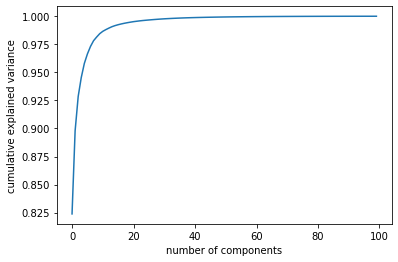

In [37]:
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [38]:
print(pca.explained_variance_ratio_)

[8.23838703e-01 7.40518881e-02 3.06343158e-02 1.68788443e-02
 1.25549492e-02 8.44229173e-03 6.67672654e-03 5.11347664e-03
 3.26984451e-03 2.99058743e-03 2.11032048e-03 1.52540656e-03
 1.36718622e-03 1.24817229e-03 9.61429739e-04 7.88232554e-04
 6.82048885e-04 5.89889655e-04 5.28912015e-04 4.74465480e-04
 4.50236980e-04 3.56614049e-04 3.42134195e-04 2.96669019e-04
 2.58740476e-04 2.47189590e-04 2.30760792e-04 2.21973992e-04
 2.03880826e-04 1.88684791e-04 1.78680348e-04 1.55723017e-04
 1.38540114e-04 1.34336640e-04 1.24278718e-04 1.17009051e-04
 1.07972172e-04 9.77856840e-05 8.56349686e-05 7.93994164e-05
 7.75088138e-05 6.82626874e-05 6.34083023e-05 6.18810279e-05
 5.83496333e-05 5.51990993e-05 5.27166995e-05 4.97991647e-05
 4.64148323e-05 4.49773520e-05 4.25551634e-05 4.04206654e-05
 3.79817122e-05 3.29759379e-05 3.06701599e-05 2.95675551e-05
 2.83976300e-05 2.74670797e-05 2.59613107e-05 2.41995661e-05
 2.26285787e-05 2.00529042e-05 1.91212894e-05 1.84114574e-05
 1.81838265e-05 1.686457

In [39]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
X_test_df = pd.DataFrame(data = y_train, columns = ['y'])
print(X_test_df)
finalDf = pd.concat([principalDf, X_test_df], axis = 1)
finalDf
print(len(y_train))

     y
341  0
198  0
87   1
309  0
615  0
..  ..
65   1
395  0
308  0
347  0
463  0

[662 rows x 1 columns]
662


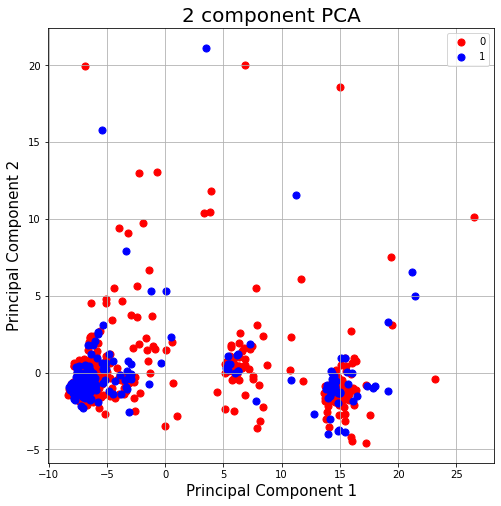

In [40]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['y'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


c:\users\sarth\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


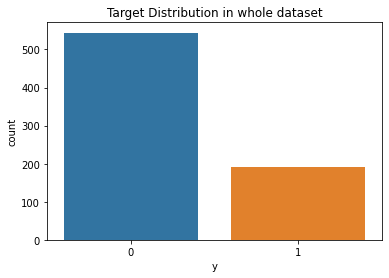

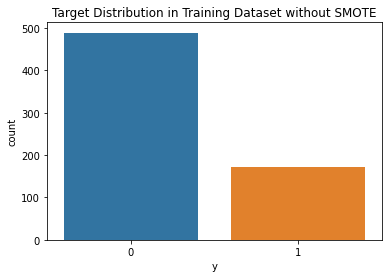

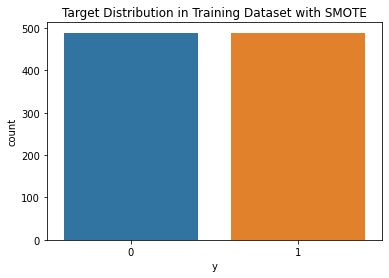

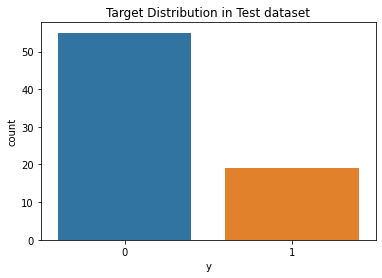

In [41]:
X_train, X_test, y_train, y_test = generate_train_test_data(sampling = True)

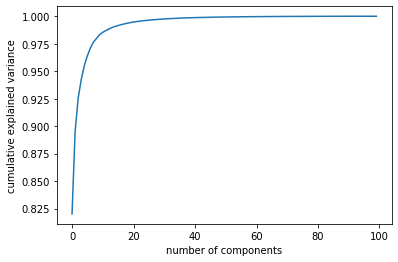

In [42]:
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [43]:
print(pca.explained_variance_ratio_)

[8.20119703e-01 7.51044285e-02 3.03346239e-02 1.69507912e-02
 1.25859601e-02 9.12459777e-03 7.09130537e-03 5.26682168e-03
 3.40533347e-03 3.31667937e-03 2.09908505e-03 1.53564442e-03
 1.46955208e-03 1.34317747e-03 9.87880842e-04 8.36755201e-04
 8.06888765e-04 6.59123562e-04 6.42982733e-04 5.62367153e-04
 4.67778634e-04 4.08019631e-04 4.02229210e-04 3.31039871e-04
 3.06374670e-04 2.76654526e-04 2.42141086e-04 2.35581823e-04
 2.19393240e-04 2.03392124e-04 1.95850184e-04 1.69289613e-04
 1.59709944e-04 1.39732745e-04 1.32911637e-04 1.31215279e-04
 1.15747028e-04 1.11330577e-04 9.43778760e-05 8.45234820e-05
 8.09254695e-05 7.26408950e-05 6.79176350e-05 6.36415769e-05
 6.23453282e-05 5.87496239e-05 5.57804646e-05 5.30553859e-05
 5.02968203e-05 4.94685618e-05 4.50392473e-05 4.30427751e-05
 4.08181447e-05 3.50173445e-05 3.30983225e-05 3.14943559e-05
 2.91278094e-05 2.84641497e-05 2.67439648e-05 2.51454603e-05
 2.44049253e-05 2.10988777e-05 2.04715133e-05 1.97440616e-05
 1.88234597e-05 1.718182

In [44]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
X_test_df = pd.DataFrame(data = y_train, columns = ['y'])
finalDf = pd.concat([principalDf, X_test_df], axis = 1)
finalDf

,principal component 1,principal component 2,y
0,17.096395,-1.596469,0
1,-5.115368,-0.740204,0
2,-4.394415,0.337226,1
3,-3.853495,1.504747,0
4,-7.088949,-1.432126,0
...,...,...,...
973,6.027110,15.679722,1
974,-4.964122,-1.702581,1
975,-6.141570,0.033096,1
976,-1.788323,-0.057197,1


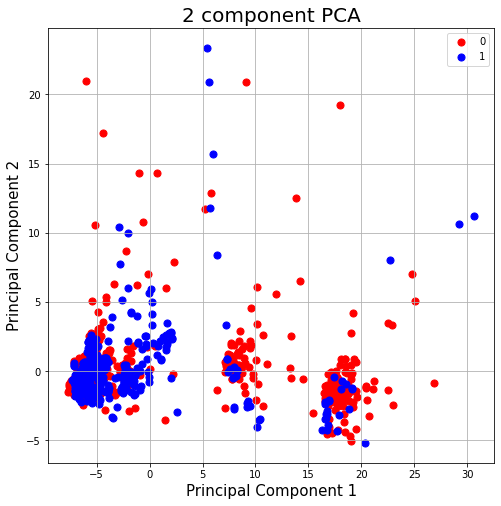

In [45]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['y'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()